In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

from datautils import create_img_from_classes_9, create_img_from_classes_14

In [2]:
data_dir = "grid_dir/train/"
sieve_dir = os.path.join(data_dir, "lc_sieve")
classes_dir = os.path.join(data_dir, "reduced_classes")
rgb_dir = os.path.join(data_dir, "rgb")
files = os.listdir(sieve_dir)

In [3]:
def up9(lc):
    return create_img_from_classes_9(lc)

def up14(lc):
    return create_img_from_classes_14(lc)

### Create image of lc vs. lc_sieved

11131


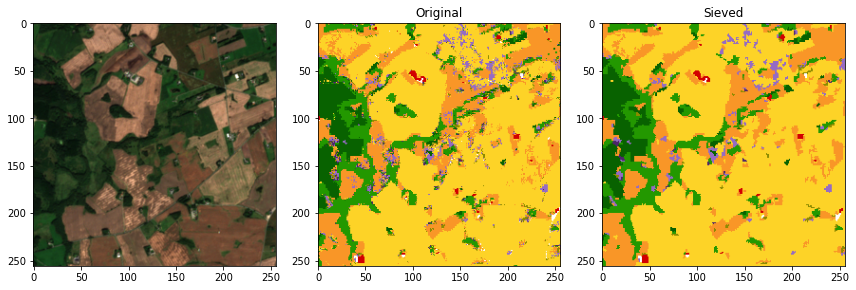

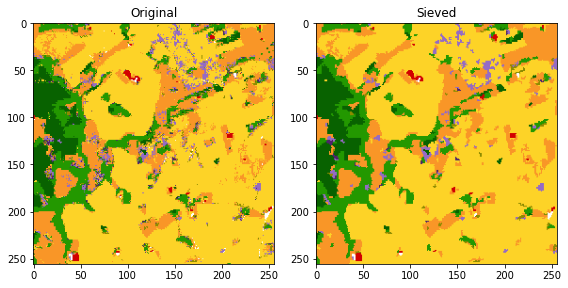

In [4]:
idx = np.random.randint(len(files))
idx = 11131
print(idx)

with np.load(os.path.join(sieve_dir, files[idx])) as f:
    s_lc = f["arr_0"]
    
with np.load(os.path.join(classes_dir, files[idx])) as f:
    lc = f["arr_0"]
    
with Image.open(os.path.join(rgb_dir, files[idx].split(".")[0] + ".png")) as f:
    rgb = np.array(f)

lc = up9(lc)
s_lc = up9(s_lc)
fig, ax = plt.subplots(1,3, figsize=(12,4))
fig.tight_layout()
ax[0].imshow(rgb)

ax[1].imshow((lc))
ax[1].set_title("Original")

ax[2].imshow((s_lc))
ax[2].set_title("Sieved")

fig, ax = plt.subplots(1,2, figsize=(8,4))
fig.tight_layout()

ax[0].imshow((lc))
ax[0].set_title("Original")

ax[1].imshow((s_lc))
ax[1].set_title("Sieved")
plt.savefig("images/sieve_example.pdf")

curr_dir = os.path.join("images", "sieve_example")
if not os.path.exists(curr_dir):
    os.mkdir(curr_dir)
    
plt.imsave(os.path.join(curr_dir, "original.png"), lc)
plt.imsave(os.path.join(curr_dir, "sieved.png"), s_lc)

In [ ]:
# 11631 er golfvöllur

## Count number of classes

In [ ]:
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [ ]:
dataset = "train"
root_dir = f"grid_dir/{dataset}/lc_classes"
files = os.listdir(root_dir)

In [ ]:
total_counts = np.zeros(14)

for idx in tqdm(range(len(files))):

    with np.load(os.path.join(root_dir, files[idx])) as f:
        lc = f["arr_0"]
        lc = np.argmax(lc, axis=2)
    counts = np.bincount(lc.flatten())
    total_counts[:counts.shape[0]] += counts

In [ ]:
total_counts
total_pixels = np.sum(total_counts)
weights = total_counts / total_pixels
labels = ["Clouds", "Artificial surfaces and constructions", "Cultivated areas", "Vineyards", "Broadleaf tree cover", "Coniferous tree cover", "Herbaceous vegetation", "Moors and Heathland", "Sclerophyllous vegetation", "Marshes", "Peatbogs", "Natural material surfaces", "Permanent snow covered surfaces", "Water bodies"]

In [ ]:
plt.figure(figsize=(10,8))
plt.barh( np.arange(14),weights)
dataset_name = "Validation" if dataset == "val" else "Training"
plt.title(f"{dataset_name} classes ratio")
plt.yticks(np.arange(14), labels, ha="right")
plt.gcf().subplots_adjust(left=0.3)
plt.xlabel("Ratio")
plt.savefig(f"{dataset}_classesratio.pdf")
